<a href="https://colab.research.google.com/github/arusskina/neuro-algoritms/blob/main/test_cancer1_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/arusskina/neuro-algoritms.git

Cloning into 'neuro-algoritms'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 145 (delta 84), reused 109 (delta 51), pack-reused 0
Receiving objects: 100% (145/145), 41.38 KiB | 8.28 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [3]:
%cd neuro-algoritms

/content/neuro-algoritms


In [4]:
from esp import ESPAlgorithm
from esp import Cancer1Dataset
import random
import matplotlib.pyplot as plt
import time

In [5]:
random.seed(1)

Объявляем параметры алгоритма: размер скрытого слоя; размер популяции; количество последних поколений, задающих взрывную мутацию; минимальное количество попыток для нейрона.

In [11]:
algorithm_params = (10, 15, 2, 2)


Заргужаем тестовые данные

In [12]:
cancer1_dataset = Cancer1Dataset()
x_train, y_train = cancer1_dataset.get_train_data()

Создаём алгоритм

In [13]:
algorithm = ESPAlgorithm(
    hidden_layer_size=algorithm_params[0],
    population_size=algorithm_params[1],
    input_count=x_train.shape[1],
    output_count=y_train.shape[1],
    last_generations_count=algorithm_params[2],
    trials_per_neuron=algorithm_params[3])

Инициализируем алгоритм

In [14]:
algorithm.init(
    min_value=-1.0,
    max_value=1.0)

Запускаем алгоритм

In [16]:
start_time = time.time()
result = algorithm.train(
    generations_count=500,
    x_train=x_train,
    y_train=y_train)

/content/neuro-algoritms/esp/activations.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-input_data))


Взрывная мутация для подпопуляции   0. Текущее поколение  62
Взрывная мутация для подпопуляции   1. Текущее поколение  60
Взрывная мутация для подпопуляции   2. Текущее поколение  62
Взрывная мутация для подпопуляции   8. Текущее поколение  58
Поколение     0, Количество попыток 117, Приспособленность лучшего нейрона 0.083048, Время выполнения 1.125 s
Взрывная мутация для подпопуляции   3. Текущее поколение  59
Взрывная мутация для подпопуляции   9. Текущее поколение  58
Поколение     1, Количество попыток 132, Приспособленность лучшего нейрона 0.083048, Время выполнения 1.239 s
Поколение     2, Количество попыток 150, Приспособленность лучшего нейрона 0.083048, Время выполнения 1.410 s
Взрывная мутация для подпопуляции   0. Текущее поколение  63
Взрывная мутация для подпопуляции   2. Текущее поколение  63
Взрывная мутация для подпопуляции   4. Текущее поколение  59
Взрывная мутация для подпопуляции   5. Текущее поколение  61
Взрывная мутация для подпопуляции   7. Текущее поколение  60

In [17]:
print("Время выполнения %s секунд" % (time.time() - start_time))

Время выполнения 500.22594118118286 секунд


Выводим изменение среднеквадратичной ошибки (приспособленности) лучшей нейронной сети в процессе эволюции

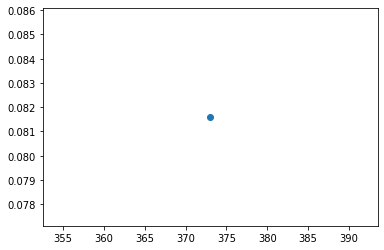

In [18]:
x = [item[0] for item in result]
y = [item[1] for item in result]
plt.scatter(x, y)
plt.show()